### importing

In [1]:
from visualitzacions import *

/Users/davidmarti/Library/CloudStorage/OneDrive-UAB/4t curs/TFG/dades/visualitzacions.py:17: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  channel_info = np.genfromtxt("channel_info.csv", delimiter=",", dtype=None)


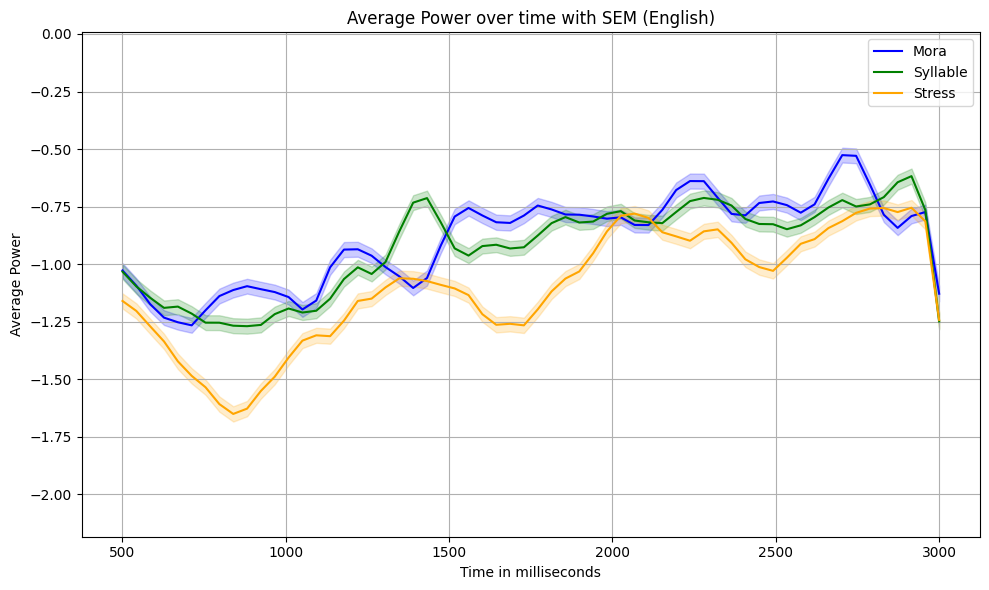

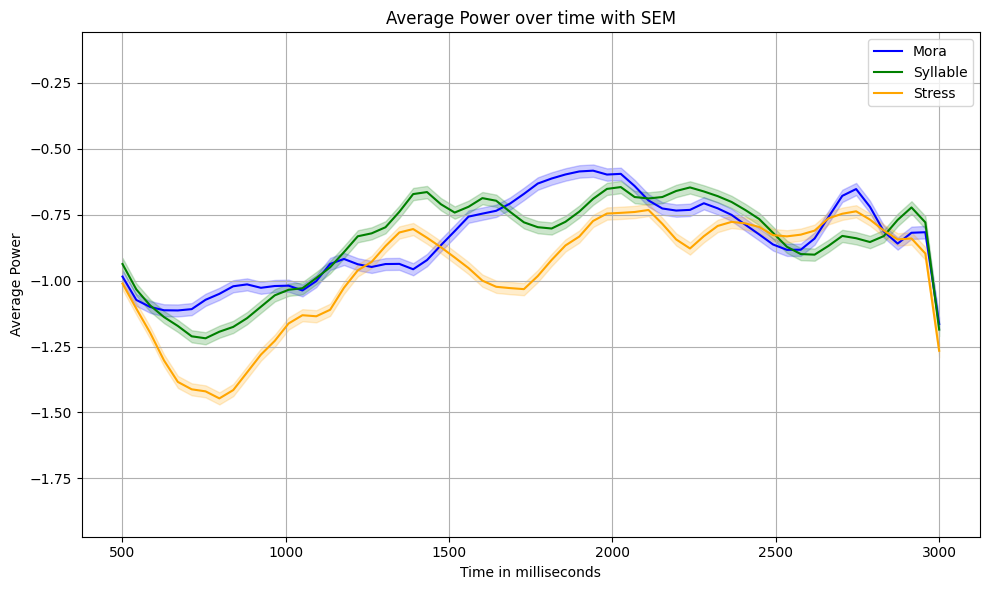

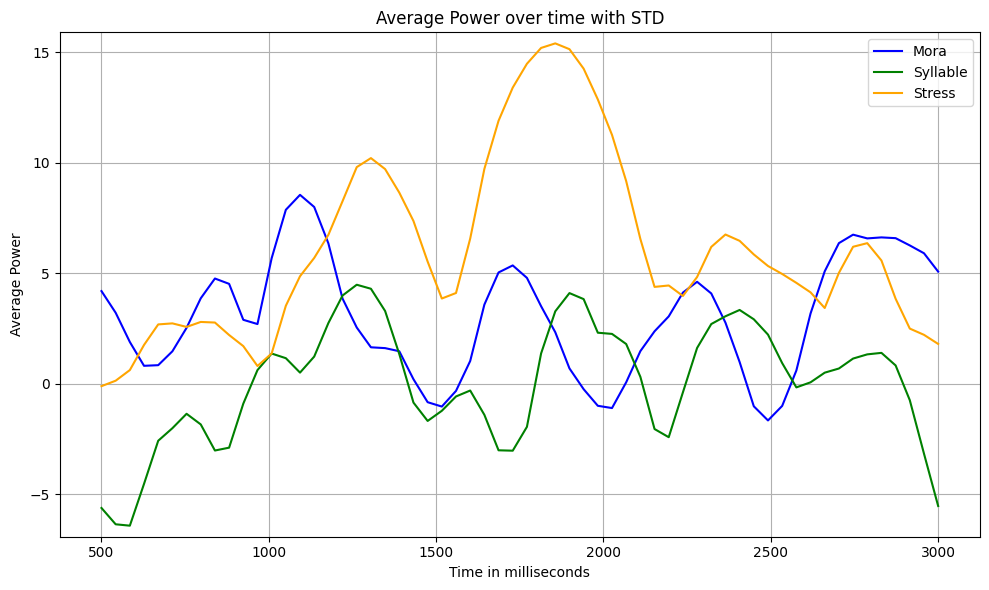

In [2]:
plot_mean_sem_std(eng_mor, eng_syl, eng_str, 'error', 'eng')
#plot_mean_sem_std(esp_mor, esp_syl, esp_str, 'error', 'esp')
plot_mean_sem_std(both_mor, both_syl, both_str, 'error')

plot_mean_sem_std(eng_mor[83:84], eng_syl[83:84], eng_str[83:84], 'none', 'eng')

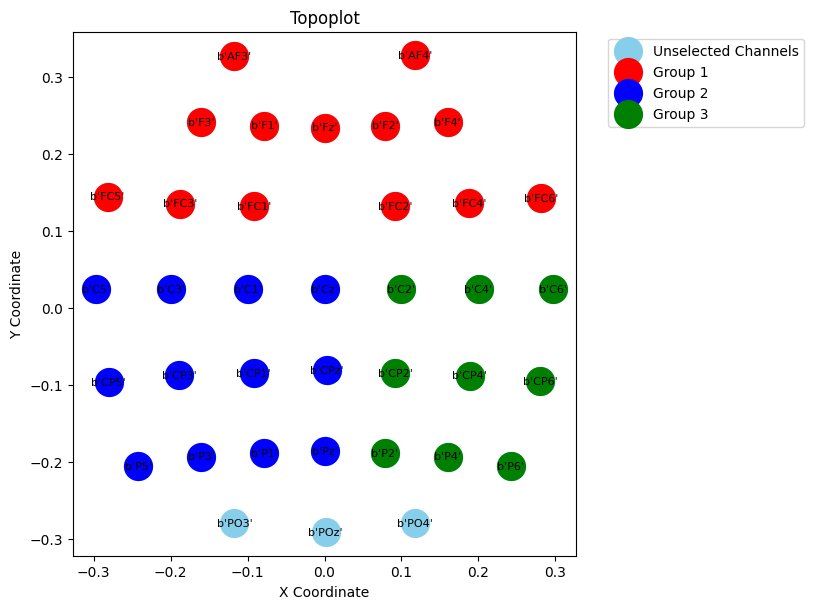

In [3]:
canals_frontals = ['AF3', 'F1', 'F3', 'FC5', 'FC3', 'FC1', 'AF4', 'F2', 'F4', 'FC6', 'FC4', 'FC2', 'Fz']
canals_esquerra = ['CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'CPz', 'Pz', 'C1', 'C3', 'C5', 'Cz']
canals_dreta = ['CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'C2', 'C4', 'C6']

topoplot([canals_frontals, canals_esquerra, canals_dreta])

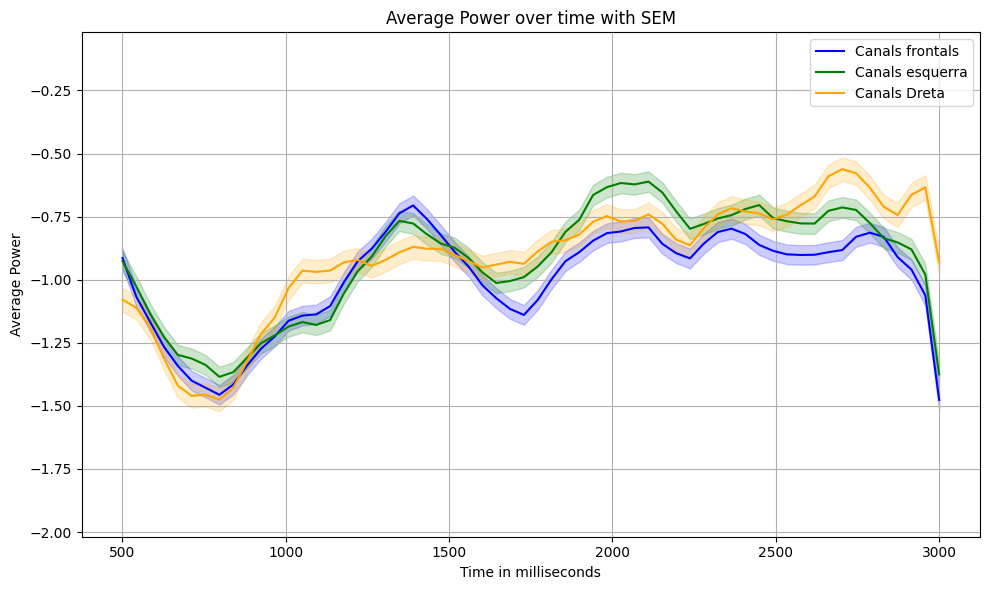

In [4]:
canals_frontals = ['AF3', 'F1', 'F3', 'FC5', 'FC3', 'FC1', 'AF4', 'F2', 'F4', 'FC6', 'FC4', 'FC2', 'Fz']
canals_esquerra = ['CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'CPz', 'Pz', 'C1', 'C3', 'C5', 'Cz']
canals_dreta = ['CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'C2', 'C4', 'C6']
dic_frontals = [channel_dict[x] for x in canals_frontals]
dic_esquerra = [channel_dict[x] for x in canals_esquerra]
dic_dreta = [channel_dict[x] for x in canals_dreta]

mor_frontals = both_str[:, dic_frontals, :]
mor_esquerra = both_str[:, dic_esquerra , :]
mor_dreta = both_str[:, dic_dreta,: ]

plot_mean_sem_std(mor_frontals, mor_esquerra, mor_dreta, 'error','canals' )



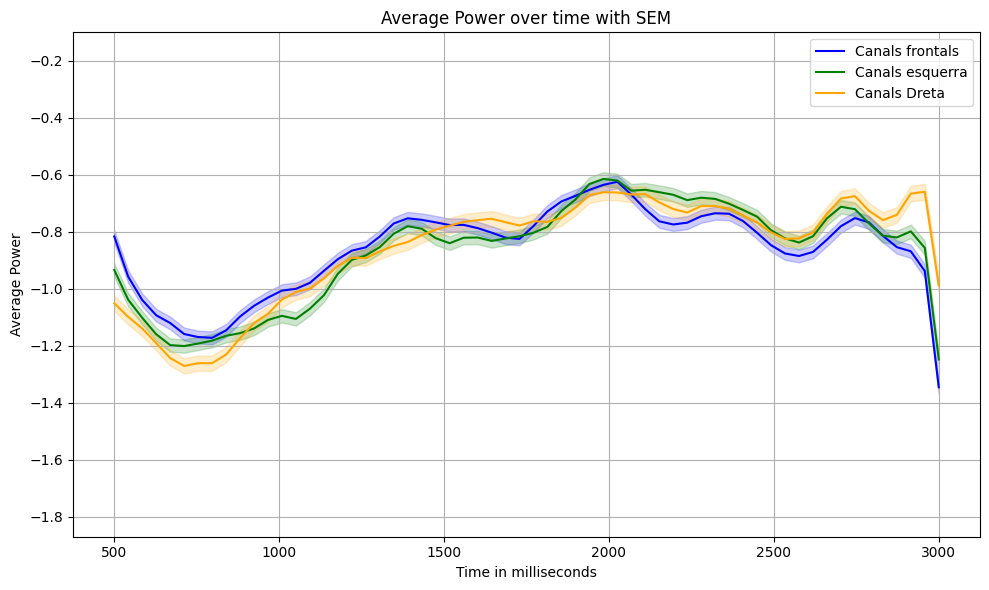

In [5]:
canals_frontals = ['AF3', 'F1', 'F3', 'FC5', 'FC3', 'FC1', 'AF4', 'F2', 'F4', 'FC6', 'FC4', 'FC2', 'Fz']
canals_esquerra = ['CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'CPz', 'Pz', 'C1', 'C3', 'C5', 'Cz']
canals_dreta = ['CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'C2', 'C4', 'C6']
dic_frontals = [channel_dict[x] for x in canals_frontals]
dic_esquerra = [channel_dict[x] for x in canals_esquerra]
dic_dreta = [channel_dict[x] for x in canals_dreta]

mor_frontals = np.concatenate((both_mor[:, dic_frontals, :], both_str[:, dic_frontals, :], both_syl[:, dic_frontals, :]), axis=0)
mor_esquerra = np.concatenate((both_mor[:, dic_esquerra, :], both_str[:, dic_esquerra, :], both_syl[:, dic_esquerra, :]), axis=0)
mor_dreta = np.concatenate((both_mor[:, dic_dreta, :], both_str[:, dic_dreta, :], both_syl[:, dic_dreta, :]), axis=0)

plot_mean_sem_std(mor_frontals, mor_esquerra, mor_dreta, 'error','canals' )

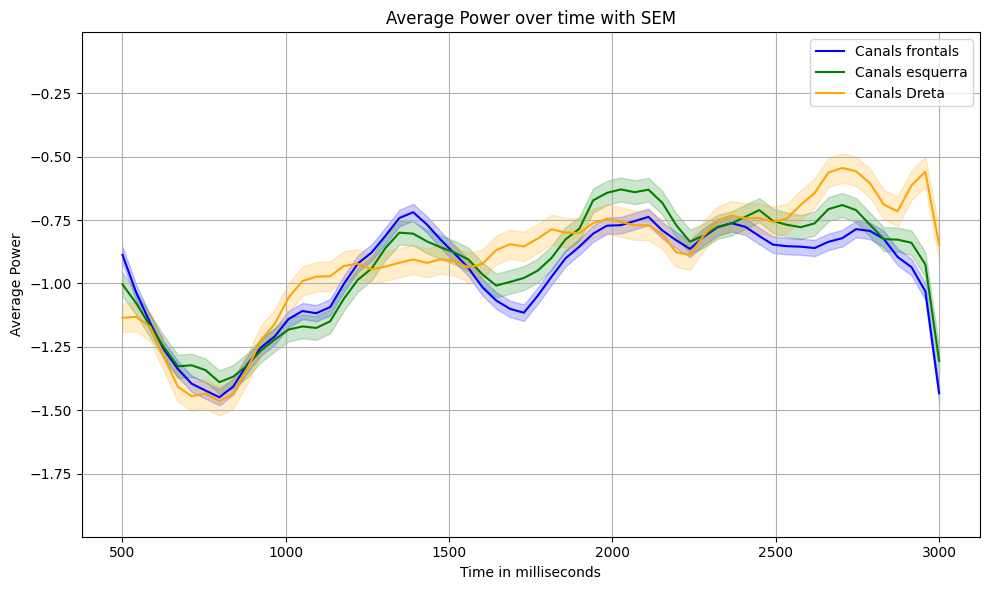

In [6]:
canals_frontals = ['AF3', 'F1', 'F3', 'FC5', 'FC3', 'FC1', 'AF4', 'F2', 'F4', 'FC6', 'FC4', 'FC2', 'Fz', 'C1', 'C3', 'C5','C2', 'C4', 'C6']
canals_esquerra = ['CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'CPz', 'Pz', 'Cz']
canals_dreta = ['CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6']
dic_frontals = [channel_dict[x] for x in canals_frontals]
dic_esquerra = [channel_dict[x] for x in canals_esquerra]
dic_dreta = [channel_dict[x] for x in canals_dreta]

mor_frontals = both_str[:, dic_frontals, :]
mor_esquerra = both_str[:, dic_esquerra , :]
mor_dreta = both_str[:, dic_dreta,: ]

plot_mean_sem_std(mor_frontals, mor_esquerra, mor_dreta, 'error', 'canals' )

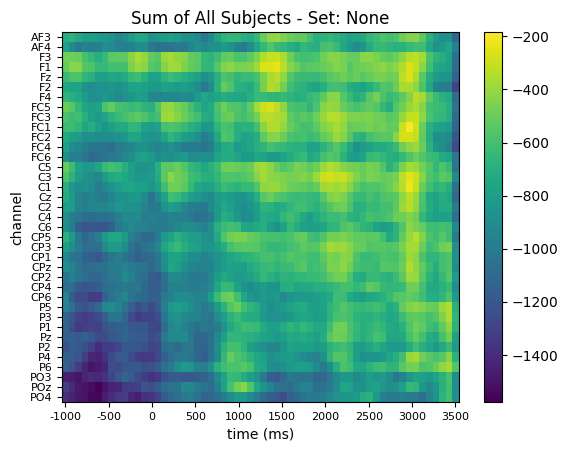

In [7]:
plot_global(eng_mor)

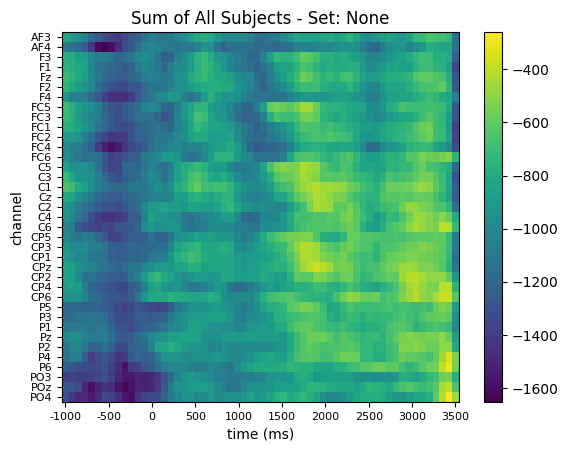

In [8]:
plot_global(eng_str)

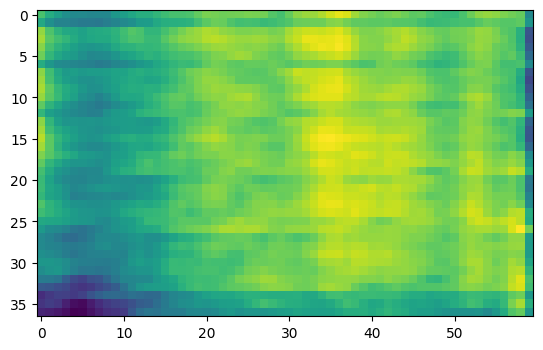

In [10]:
plt.imshow(mitjana)

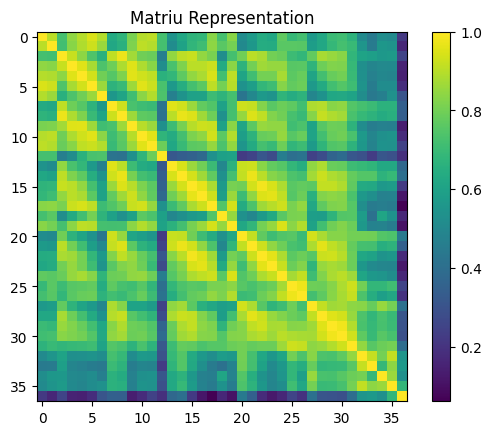

In [12]:
plot = plt.imshow(np.corrcoef(esp_str[29, :, :]), cmap='viridis', interpolation='nearest')
plt.colorbar(plot)
plt.title("Matriu Representation")
plt.show()

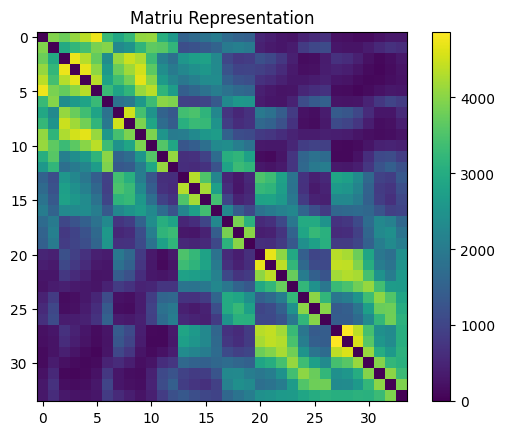

In [13]:
#crea una matriu de 37X37 pleana de zeros
matriu = np.zeros((34, 34))
# normalitzem la matriu per files
#for i in range(all_avg.shape[0]):   #  AVG
lenghts = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0}
classifications = []
for i in range(all.shape[0]):
    #correlation_matrix = np.corrcoef(all_avg[i, :, :])  # AVG 
    correlation_matrix = np.corrcoef(all[i, :34, :])
    classification = nx.community.louvain_communities(nx.Graph(correlation_matrix), resolution=0.96)
    #print(classification)
    classifications.append(classification)
    lenghts[len(classification)]+=1
    for group in classification:
        for a in group:
            for b in group:
                if a != b:
                    matriu[a, b] += 1



plot = plt.imshow(matriu, cmap='viridis', interpolation='nearest')
plt.colorbar(plot)
plt.title("Matriu Representation")
plt.show()



In [14]:
from collections import Counter

def top_n_classifications(classifications, n=5):
    filtered = [c for c in classifications if len(c) == 3]
    tuples = [tuple(sorted(map(tuple, c))) for c in filtered]
    counter = Counter(tuples)
    most_common = counter.most_common(n)
    results = []
    for groups, count in most_common:
        classification = [list(group) for group in groups]
        results.append((classification, count))
    return results

top5 = top_n_classifications(classifications, n=5)
for i, (classification, count) in enumerate(top5, 1):
    print(f"Top {i} classification appears {count} times:")
    print(classification)

print(len(classifications))


Top 1 classification appears 13 times:
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], [13, 14, 15, 16, 20, 21, 22, 23, 27, 28, 29, 30], [32, 33, 17, 18, 19, 24, 25, 26, 31]]
Top 2 classification appears 10 times:
[[0, 1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 17, 18, 19], [7, 8, 13, 14, 15, 16, 20, 21, 22, 23, 27, 28, 29, 30], [32, 33, 24, 25, 26, 31]]
Top 3 classification appears 8 times:
[[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 13, 14, 15, 16], [17, 18, 19, 6, 11, 12], [32, 33, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]]
Top 4 classification appears 7 times:
[[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12], [7, 13, 14, 15, 16, 20, 21, 22, 23, 27, 28, 29, 30], [32, 33, 17, 18, 19, 24, 25, 26, 31]]
Top 5 classification appears 7 times:
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], [13, 14, 15, 16, 20, 21, 22, 23, 27, 28, 29], [32, 33, 17, 18, 19, 24, 25, 26, 30, 31]]
5119


In [15]:
classification

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [13, 14, 15, 16, 20, 21, 22, 23, 27, 28, 29],
 [32, 33, 17, 18, 19, 24, 25, 26, 30, 31]]

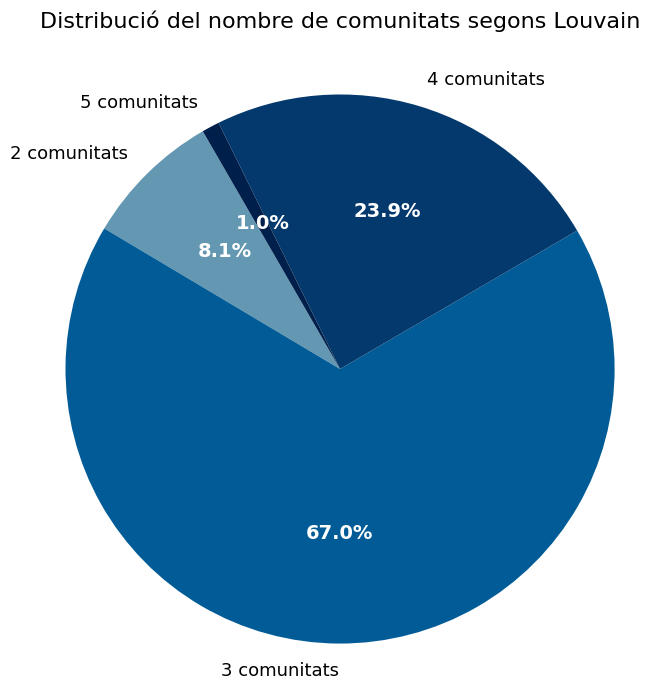

In [16]:
# Gráfico de pastel con todos los segmentos juntos y diferentes colores

colors = ['#b3cde3', '#6497b1', '#005b96', '#03396c', '#011f4b', '#a7c7e7']

fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title('Distribució del nombre de comunitats segons Louvain', fontsize=16, color='black', pad=30)  # pad añade espacio
wedges, texts, autotexts = ax.pie(
    list(lenghts.values())[1:5],
    labels=[f"{k} comunitats" for k in list(lenghts.keys())[1:5]],
    autopct='%1.1f%%',
    startangle=120,
    colors=colors[1:5],
    explode=[0]*4,  # No separar segmentos
    textprops={'fontsize': 13, 'color': 'black'},
)
plt.setp(autotexts, size=14, weight="bold", color="white")
ax.axis('equal')
plt.tight_layout()
plt.show()


In [17]:
coordenades_dict

{0: (-0.11755705716577301, 0.3270349714365076),
 1: (0.11755705716577307, 0.3278770922472252),
 2: (-0.1601583646116909, 0.24110337666746665),
 3: (-0.07873342522310944, 0.2368530915285567),
 4: (1.0381306204287178e-16, 0.23410627862239383),
 5: (0.07873554870568575, 0.2368530915285567),
 6: (0.16015836461169095, 0.24110337666746665),
 7: (-0.28179675528913056, 0.1445824433793625),
 8: (-0.18739096691157006, 0.13529376265695733),
 9: (-0.09194679555419426, 0.13239153216661748),
 10: (0.09196165993222846, 0.13239153216661748),
 11: (0.18738990517028198, 0.1358515023562022),
 12: (0.28179569354784245, 0.142849702653645),
 13: (-0.2971293612313721, 0.023885808858967544),
 14: (-0.20006284918569597, 0.02423632511264326),
 15: (-0.09976227317630078, 0.023885808858967544),
 16: (1.0381306204287178e-16, 0.023885808858967544),
 17: (0.09976121143501261, 0.024585739113948974),
 18: (0.20006284918569597, 0.02423632511264326),
 19: (0.29712829949008396, 0.023885808858967544),
 20: (-0.28041224464

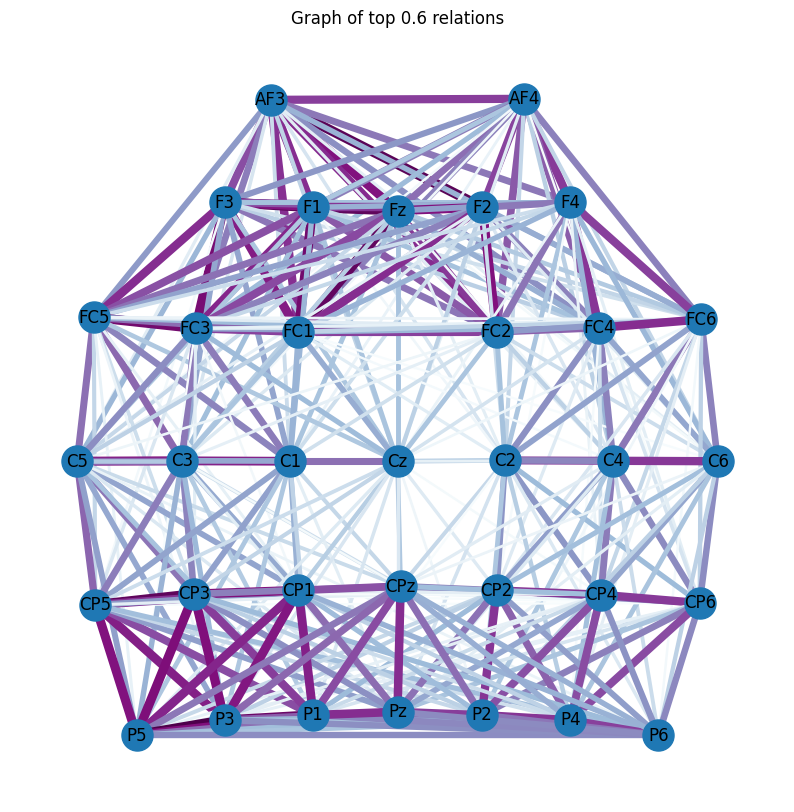

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}, {32, 33, 17, 18, 19, 24, 25, 26, 31}, {13, 14, 15, 16, 20, 21, 22, 23, 27, 28, 29, 30}]


In [18]:
matriu = matriu# la teva matriu de veinalitat. 

coordenades_dict = {0: (-0.11755705716577301, 0.3270349714365076),
 1: (0.11755705716577307, 0.3278770922472252),
 2: (-0.1601583646116909, 0.24110337666746665),
 3: (-0.07873342522310944, 0.2368530915285567),
 4: (1.0381306204287178e-16, 0.23410627862239383),
 5: (0.07873554870568575, 0.2368530915285567),
 6: (0.16015836461169095, 0.24110337666746665),
 7: (-0.28179675528913056, 0.1445824433793625),
 8: (-0.18739096691157006, 0.13529376265695733),
 9: (-0.09194679555419426, 0.13239153216661748),
 10: (0.09196165993222846, 0.13239153216661748),
 11: (0.18738990517028198, 0.1358515023562022),
 12: (0.28179569354784245, 0.142849702653645),
 13: (-0.2971293612313721, 0.023885808858967544),
 14: (-0.20006284918569597, 0.02423632511264326),
 15: (-0.09976227317630078, 0.023885808858967544),
 16: (1.0381306204287178e-16, 0.023885808858967544),
 17: (0.09976121143501261, 0.024585739113948974),
 18: (0.20006284918569597, 0.02423632511264326),
 19: (0.29712829949008396, 0.023885808858967544),
 20: (-0.2804122446493768, -0.0966366697869594),
 21: (-0.1887393783475265, -0.08751663367717172),
 22: (-0.09194679555419426, -0.08446670136924543),
 23: (0.0028879363037806723, -0.08094831180404823),
 24: (0.09196165993222846, -0.08446670136924543),
 25: (0.1887383166062383, -0.08807988463826694),
 26: (0.2804111829080887, -0.0950780849357098),
 27: (-0.24212479205723134, -0.20591727651075403),
 28: (-0.1604280468988822, -0.19332073642583092),
 29: (-0.0781898136835742, -0.1890384859681896),
 30: (1.0381306204287178e-16, -0.18632363838075827),
 31: (0.07819830761387948, -0.1890384859681896),
 32: (0.1604280468988822, -0.19332073642583092),
 33: (0.24212479205723134, -0.20591727651075403),
 34: (-0.11701769259139043, -0.27925784245672214),
 35: (0.0013484114359564386, -0.2910177729927778),
 36: (0.11701769259139053, -0.2800944520055895)}

# Filter edges to keep only the top 0.5 relations
threshold = np.percentile(matriu[matriu > 0], 40)  # Top 50% corresponds to the 90th percentile
filtered_edges = [(i, j, matriu[i, j]) for i in range(matriu.shape[0]) for j in range(matriu.shape[1]) if matriu[i, j] > threshold]

# Create a new graph with filtered edges
G = nx.Graph()
G.add_weighted_edges_from(filtered_edges)

# Plot the graph
pos = coordenades_dict
plt.figure(figsize=(10, 10))
labels = {i: channel_dict2[i] for i in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=12)
edges = G.edges(data=True)
weights = [d['weight'] * 0.0015 for _, _, d in edges]  # Scale weights for better visualization
colors = [d['weight'] for _, _, d in edges]  # Use weights for coloring
nx.draw(
    G, pos, node_size=500, with_labels=False, width=weights,
    edge_color=colors, edge_cmap=plt.cm.BuPu, edge_vmin=min(colors), edge_vmax=max(colors)
)
plt.title('Graph of top 0.6 relations')
plt.show()

# Perform community detection
classification = nx.community.louvain_communities(G, resolution=0.96)
print(classification)



/var/folders/fc/19xj87mj5vz1jr46yg3ty4740000gn/T/ipykernel_29107/168972237.py:70: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, shrink=0.7)


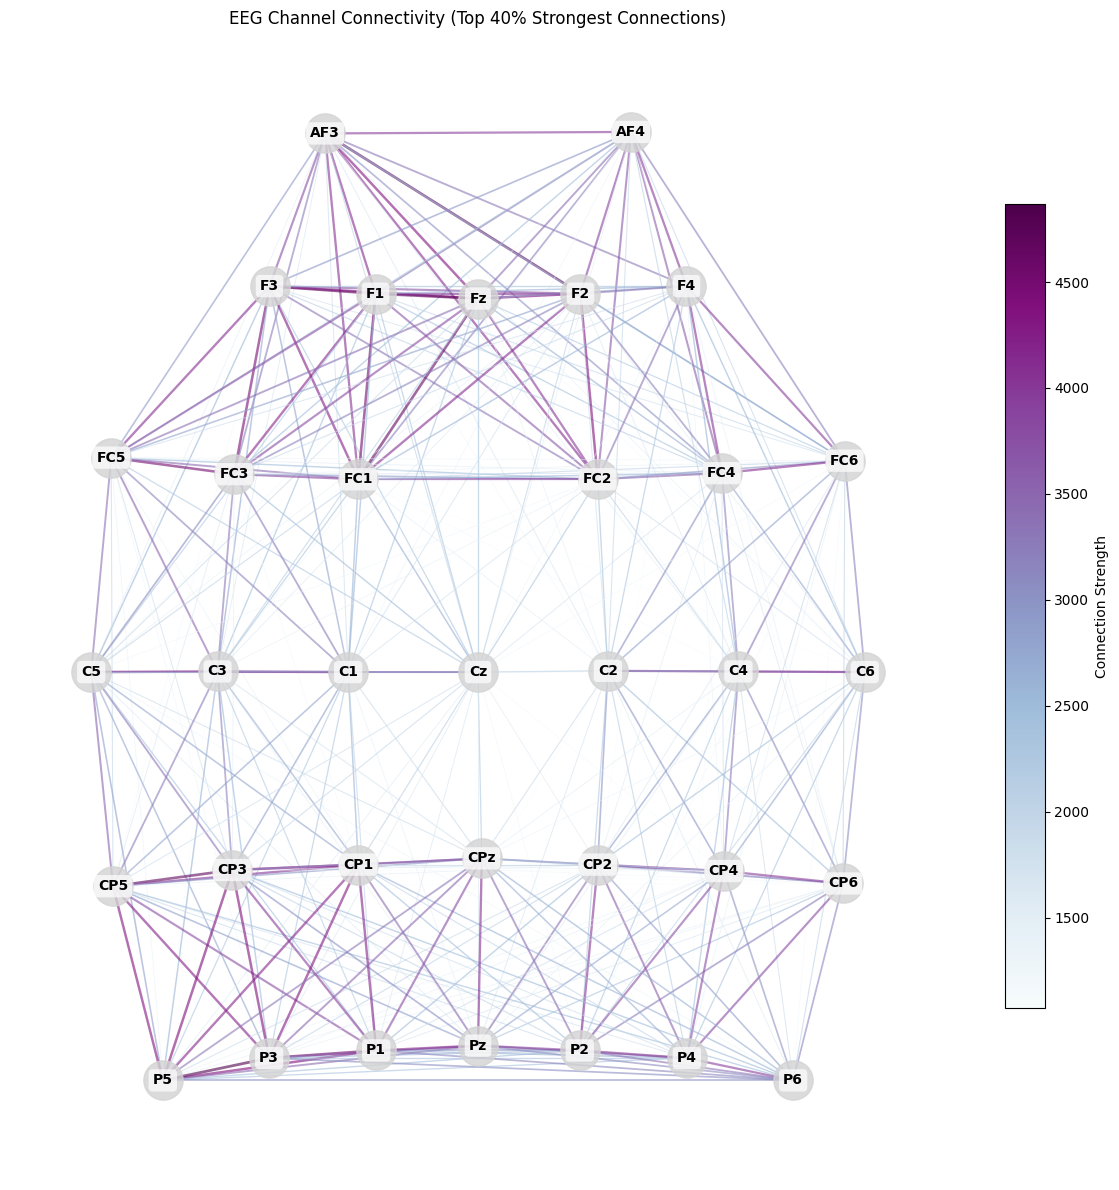

Detected communities:
Community 1: ['AF3', 'AF4', 'F3', 'F1', 'Fz', 'F2', 'F4', 'FC5', 'FC3', 'FC1', 'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1', 'Cz']
Community 2: ['C2', 'C4', 'C6', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6']


In [19]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Assuming you have these variables defined:
# matriu - your adjacency matrix
# channel_dict2 - dictionary mapping node indices to channel names
# coordenades_dict - dictionary of node positions

# Filter edges to keep only the top 40% strongest connections
threshold = np.percentile(matriu[matriu > 0], 40)
filtered_edges = [(i, j, matriu[i, j]) 
                 for i in range(matriu.shape[0]) 
                 for j in range(matriu.shape[1]) 
                 if matriu[i, j] > threshold]

# Create and configure the graph
G = nx.Graph()
G.add_weighted_edges_from(filtered_edges)

# Visualization settings
plt.figure(figsize=(12, 12))  # Increased figure size
pos = coordenades_dict
labels = {i: channel_dict2[i] for i in G.nodes()}

# Get edge properties
edges = G.edges(data=True)
weights = [d['weight'] for _, _, d in edges]
scaled_weights = [w * 2 / max(weights) for w in weights]  # Better scaling

# Create a colormap for edges
cmap = plt.cm.BuPu
norm = Normalize(vmin=min(weights), vmax=max(weights))

# Draw the graph components separately for better control
nx.draw_networkx_nodes(
    G, pos, 
    node_size=800, 
    node_color='lightgray',
    alpha=0.8
)

nx.draw_networkx_edges(
    G, pos,
    width=scaled_weights,
    edge_color=weights,
    edge_cmap=cmap,
    edge_vmin=min(weights),
    edge_vmax=max(weights),
    alpha=0.6
)

# Draw labels with better formatting
nx.draw_networkx_labels(
    G, pos, labels,
    font_size=10,
    font_weight='bold',
    bbox=dict(
        facecolor='white',
        edgecolor='none',
        alpha=0.7,
        boxstyle='round,pad=0.3'
    )
)

# Add colorbar for edge weights
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, shrink=0.7)
cbar.set_label('Connection Strength', fontsize=10)

# Final touches
plt.title('EEG Channel Connectivity (Top 40% Strongest Connections)', fontsize=12)
plt.axis('off')
plt.tight_layout()
plt.show()

# Community detection
classification = nx.community.louvain_communities(G, resolution=0.96)
print("Detected communities:")
for i, comm in enumerate(classification):
    print(f"Community {i+1}: {[channel_dict2[node] for node in comm]}")

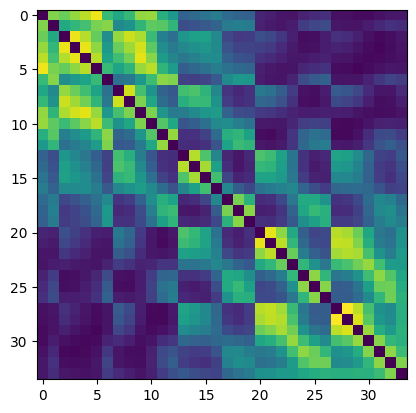

In [20]:
#plot matriu
plt.imshow(matriu, cmap='viridis', interpolation='nearest')


In [21]:
weights

[3938.0,
 3776.0,
 4102.0,
 4357.0,
 4736.0,
 3302.0,
 2911.0,
 3238.0,
 4073.0,
 4120.0,
 3044.0,
 2602.0,
 1537.0,
 1689.0,
 1854.0,
 2035.0,
 1705.0,
 1544.0,
 1490.0,
 2964.0,
 3230.0,
 3412.0,
 3882.0,
 3986.0,
 2298.0,
 2495.0,
 3183.0,
 3650.0,
 3596.0,
 3194.0,
 1178.0,
 1235.0,
 1358.0,
 1554.0,
 1977.0,
 2091.0,
 1979.0,
 1104.0,
 4726.0,
 4320.0,
 3709.0,
 2387.0,
 4097.0,
 4475.0,
 4264.0,
 3314.0,
 2105.0,
 1771.0,
 2560.0,
 2755.0,
 2786.0,
 2297.0,
 1188.0,
 4689.0,
 4033.0,
 2635.0,
 3747.0,
 4174.0,
 4534.0,
 3644.0,
 2381.0,
 1985.0,
 2246.0,
 2446.0,
 2574.0,
 2333.0,
 1242.0,
 4348.0,
 2822.0,
 3378.0,
 3828.0,
 4660.0,
 4003.0,
 2656.0,
 2209.0,
 1922.0,
 2126.0,
 2341.0,
 2357.0,
 1495.0,
 1219.0,
 1171.0,
 3294.0,
 2821.0,
 3184.0,
 4106.0,
 4363.0,
 3182.0,
 2687.0,
 1459.0,
 1619.0,
 1825.0,
 2069.0,
 1833.0,
 1654.0,
 1579.0,
 1834.0,
 1945.0,
 2588.0,
 3332.0,
 4016.0,
 3920.0,
 1355.0,
 2305.0,
 2599.0,
 2554.0,
 1132.0,
 1379.0,
 1503.0,
 4515.0,
 3424.0,
 

Components after removing edges: 3 [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}, {13, 14, 15}, {16}]


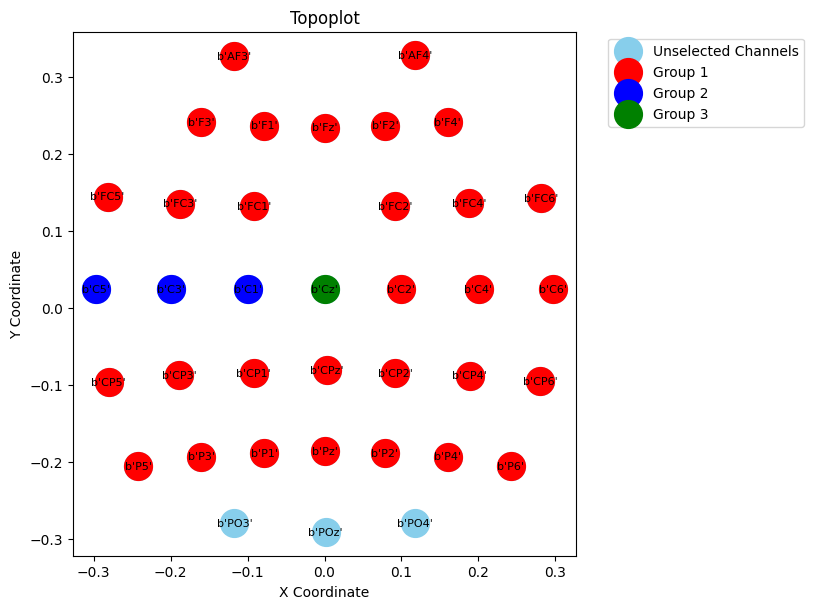

In [22]:
# Normalitza els valors de la matriu per a que la suma de cada fila sigui 1
matriu = matriu / matriu.sum(axis=1, keepdims=True)
# Crea un graf amb NetworkX
G = nx.Graph()
for i in range(matriu.shape[0]):
    for j in range(matriu.shape[1]):
        if matriu[i, j] > 0:
            G.add_edge(i, j, weight=matriu[i, j])
#elimina les arestes amb grau mes petit fins a tenir 3 comunitats en el graf
while True:
    components = list(nx.connected_components(G))
    if len(components) <= 2:
        #calcula el grau minim de les arestes
        min_weight = min([G[u][v]['weight'] for u, v in G.edges()])

        #itera totes les arestes
        for u, v in list(G.edges()):
            if G[u][v]['weight'] == min_weight:
                G.remove_edge(u, v)
    else:
        break

print("Components after removing edges:", len(components), components)

comcan = []
for com in components:
    canals = []
    for ch in com:
        canals.append(channel_dict2[ch])
    comcan.append(canals)

topoplot(comcan)


Components after removing edges: 1 [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]


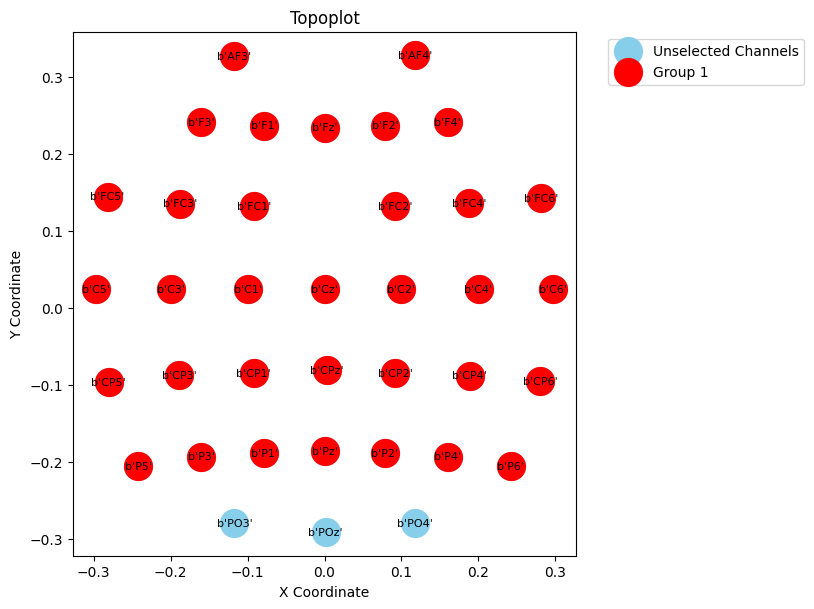

In [23]:
# Normalitza els valors de la matriu per a que la suma de cada fila sigui 1
matriu = matriu / matriu.sum(axis=1, keepdims=True)
# Crea un graf amb NetworkX
G = nx.Graph()
for i in range(matriu.shape[0]):
    for j in range(matriu.shape[1]):
        if matriu[i, j] > 0:
            G.add_edge(i, j, weight=matriu[i, j])
G2 = nx.Graph()
G2.add_nodes_from(G.nodes())

#elimina les arestes amb grau mes petit fins a tenir 3 comunitats en el graf

while True:
    components = list(nx.connected_components(G2))
    if len(components) > 3:
        #calcula el grau minim de les arestes
        max_weight = max([G[u][v]['weight'] for u, v in G.edges()])

        for u, v in list(G.edges()):
            if G[u][v]['weight'] == max_weight:
                G2.add_edge(u, v)
                G[u][v]['weight'] = 0
                if min([len(com) for com in components]) +5 < max([len(com) for com in components]):
                    G2.remove_edge(u, v)
                    #G[u][v]['weight'] = max_weight


        #itera totes les arestes

    else:
        break

print("Components after removing edges:", len(components), components)

comcan = []
for com in components:
    canals = []
    for ch in com:
        canals.append(channel_dict2[ch])
    comcan.append(canals)

topoplot(comcan)

### PCA

In [25]:
from sklearn.decomposition import PCA
import numpy as np

n_components = 10

data = np.concatenate(all_avg, axis=1).T  # Forma (144*90, 37) = (12.960, 37)

pca = PCA(n_components)
pca.fit(data)

# Loadings globals (forma 4x37)
loadings = pca.components_

# Canals més importants per component (global)
top_global = [np.argmax(np.abs(loadings[i])) for i in range(n_components)]
print("Canals globals:", top_global)  # Ex: [12, 5, 28, 17] → Cz, Fz, Oz, Pz
# Print names of the channels



Canals globals: [21, 33, 12, 36, 12, 26, 36, 33, 35, 19]


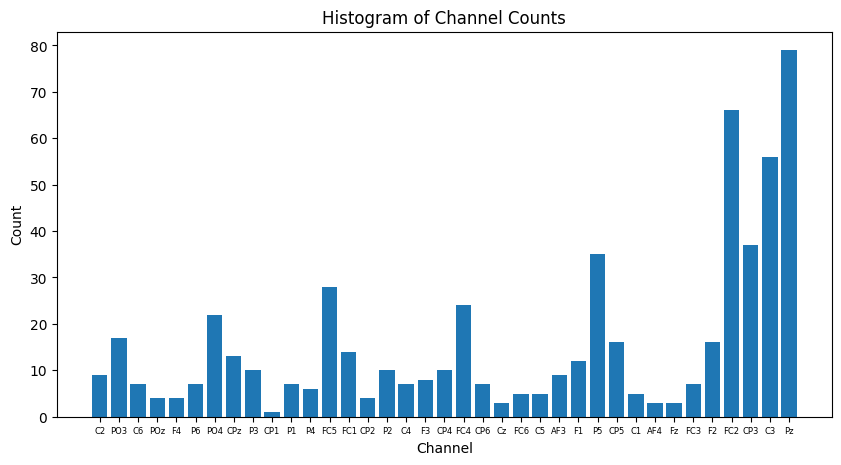

In [26]:
from sklearn.decomposition import PCA
import pandas as pd
chcount = {}

for s in range(len(all_avg)):
    pca = PCA(n_components=4)
    data = all_avg[s, :, :]
    pca.fit(data.T)
    loadings = pd.DataFrame(pca.components_, columns=range(37))
    top_channels = [loadings.iloc[i].abs().idxmax() for i in range(4)]
    for c in top_channels:
        if c in chcount:
            chcount[c] += 1
        else:
            chcount[c] = 1

channels = list(chcount.keys())
counts = list(chcount.values())
channel_tick_fontsize = 6

plt.figure(figsize=(10, 5))
plt.bar(channels, counts)
plt.xlabel("Channel")
plt.ylabel("Count")
plt.title("Histogram of Channel Counts")
plt.xticks(
        ticks=np.arange(len(channels)),
        labels=[
            channel_info[idx][1].decode('utf-8') if isinstance(channel_info[idx][1], bytes)
            else channel_info[idx][1] for idx in channels
        ],
        fontsize=channel_tick_fontsize
)
plt.show()

In [27]:
corr_matrix = np.corrcoef(mor_avg[0, :, :])
print(corr_matrix)

[[1.         0.86078268 0.91995932 ... 0.45366137 0.3984624  0.26909931]
 [0.86078268 1.         0.72994914 ... 0.51439186 0.30707386 0.31453017]
 [0.91995932 0.72994914 1.         ... 0.40342535 0.40738495 0.27121296]
 ...
 [0.45366137 0.51439186 0.40342535 ... 1.         0.46060943 0.85761146]
 [0.3984624  0.30707386 0.40738495 ... 0.46060943 1.         0.66635691]
 [0.26909931 0.31453017 0.27121296 ... 0.85761146 0.66635691 1.        ]]


In [29]:
def find_communities(correlation_matrix, start_threshold=0.5, step=0.001, target_communities=(5,6)):
    threshold = start_threshold
    while threshold < 1.0:   
        # Apply threshold
        adjacency_matrix = (np.abs(correlation_matrix) > threshold).astype(int)
    
        # Create graph
        graph = nx.from_numpy_array(adjacency_matrix)
    
        # plot graph
        #nx.draw(graph)
        #plt
        #plt.show()

        # Compute Louvain partition
        partition = nx.community.louvain_communities(graph)
        num_communities = len(partition)
    
        #print(f"Threshold: {threshold:.2f}, Communities: {num_communities}")
    
        if num_communities in target_communities:
            return threshold, partition, num_communities
    
        threshold += step
    
    return None, None, None





decidim fer nomes dues comunitats ja que sembla que la majoria de canals es queden en dues comunitats, pero farem proves amb la informacio dels canals 17 i 21, ja que sempre son els ultims amb diferencia de posicionarse. 


In [ ]:
# Para cada comunidad, calculamos el canal que tenga la mayor suma de correlaciones
# con los demás canales de la misma comunidad.
# Se asume que las filas/columnas de corr_matrix_avg corresponden a los índices de central_chans.

for i, community in enumerate(partition):
    best_channel = None
    best_score = -np.inf
    # Convertir la comunidad a lista para indexación
    community_list = list(community)
    for chan_idx in community_list:
        # Sumar las correlaciones entre el canal y los demás de la comunidad
        score = np.sum(corr_matrix_avg[chan_idx, community_list])
        if score > best_score:
            best_score = score
            best_channel = chan_idx
    print(f"Comunidad {i+1}: canal representativo --> {central_chans[best_channel]} (suma de correlaciones = {best_score:.3f})")

In [ ]:
plot_channel(mor_avg, 48)

### binaritzacio


In [31]:
for subject_idx in range(all_avg.shape[0]):
    for channel_idx in range(all_avg.shape[1]):
        # calcula stdev
        stdev = np.std(all_avg[subject_idx, channel_idx, :])
        #for t in all_avg.shape[2]:
    # binaritzar respecte el valor absolut de la stdev, ja suoposem que les dades son normalitzades. 
            

### classifying


In [ ]:
# Índices de los canales que queremos cargar
channels_to_load = [18, 47]

# Carga los datos de los canales seleccionados
mor_selected = mor_avg[:, channels_to_load, :]
syl_selected = syl_avg[:, channels_to_load, :]
str_selected = str_avg[:, channels_to_load, :]

mor_selected = mor_selected[:, :, :60]
syl_selected = syl_selected[:, :, :60]
str_selected = str_selected[:, :, :60]

X_selected = np.concatenate((str_selected, syl_selected, mor_selected), axis=0)
print(X_selected.shape)


In [ ]:
# Inicializar matriz de features
n_trials = X_selected.shape[0]
X_features = np.zeros((n_trials, 4))  # 2 canales × 2 features = 4

for i in range(n_trials):
    # Canal 1 (ej: C3)
    X_features[i, 0] = np.mean(X_selected[i, 0, :])  # Media
    X_features[i, 1] = np.var(X_selected[i, 0, :])   # Varianza
    
    # Canal 2 (ej: C4)
    X_features[i, 2] = np.mean(X_selected[i, 1, :])  # Media
    X_features[i, 3] = np.var(X_selected[i, 1, :])   # Varianza


In [ ]:
print(X_features.shape)
print(X_features[0:5, :])

In [ ]:
from sklearn.preprocessing import StandardScaler

X_features_str_mor = np.concatenate((X_features[:48], X_features[-48:]), axis=0)


In [ ]:
# histograma de features
plt.hist(X_features_str_mor[:, 0], bins=20, alpha=0.5, label='Media C3')

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict, LeaveOneOut

# Etiquetas: 0 = "stress", 1 = "mora"
y = np.concatenate([np.zeros(48), np.ones(48)])

# Modelo SVM
model = SVC(kernel='linear', C=1)  # C bajo para regularizar

# Predicciones con validación cruzada
y_pred = cross_val_predict(model, X_features_str_mor, y, cv=LeaveOneOut())

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Definir pipeline y parámetros
model = make_pipeline(SVC(kernel='linear'))
param_grid = {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Búsqueda con validación cruzada LOO
grid = GridSearchCV(model, param_grid, cv=LeaveOneOut(), scoring='accuracy')
grid.fit(X_features_str_mor, y)

# Mejor C
print(f"Mejor C: {grid.best_params_['svc__C']}")
print(f"Mejor accuracy: {grid.best_score_:.2f}")

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(f"Accuracy: {accuracy_score(y, y_pred):.2f}")
print("Matriz de confusión:")
print(confusion_matrix(y, y_pred))

#### classificador one versus all


In [ ]:
scaler = StandardScaler()
X_features_mor_all = np.concatenate((X_features[:24], X_features[44:68], X_features[-48:]), axis=0)
X_scaled_mor_all = scaler.fit_transform(X_features_mor_all)
print(X_scaled_mor_all.shape)  

In [ ]:
# Etiquetas: 0 = "stress" and "syllable", 1 = "mora"
y = np.concatenate([np.zeros(48), np.ones(48)])

# Modelo SVM
model = SVC(kernel='linear', C=10)  # C bajo para regularizar

# Predicciones con validación cruzada
y_pred = cross_val_predict(model, X_scaled_mor_all, y, cv=LeaveOneOut())

In [ ]:
# Definir pipeline y parámetros
model = make_pipeline(StandardScaler(), SVC(kernel='linear'))
param_grid = {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Búsqueda con validación cruzada LOO
grid = GridSearchCV(model, param_grid, cv=LeaveOneOut(), scoring='accuracy')
grid.fit(X_scaled_mor_all, y)

# Mejor C
print(f"Mejor C: {grid.best_params_['svc__C']}")
print(f"Mejor accuracy: {grid.best_score_:.2f}")

In [ ]:
print(f"Accuracy: {accuracy_score(y, y_pred):.2f}")
print("Matriz de confusión:")
print(confusion_matrix(y, y_pred))

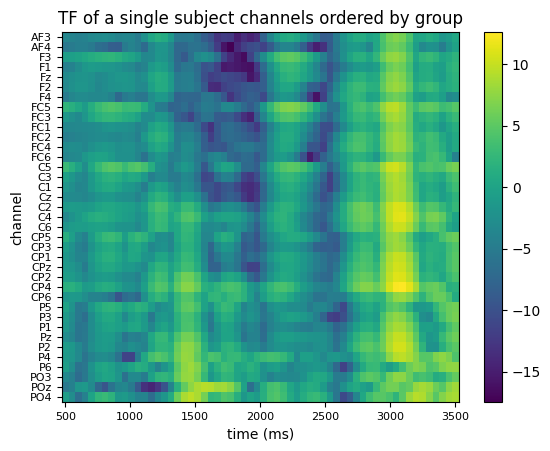

In [ ]:
plt.imshow(both_mor[5, :, :], aspect='auto')
time_ms_label = "time (ms)"
channel_label = "channel"
channel_tick_fontsize = 8

# Define time range and resolution
time_start = 500  # -1 second in ms
time_end = 3500     # 3.5 seconds in ms
time_resolution = 500  # 50 ms
time_ticks = np.arange(time_start, time_end + time_resolution, time_resolution)
time_tick_positions = np.linspace(0, both_mor.shape[2] - 1, len(time_ticks))
plt.xlabel(time_ms_label)
plt.ylabel(channel_label)
plt.xticks(
    ticks=time_tick_positions,
    labels=[f"{int(tick)}" for tick in time_ticks],
    fontsize=channel_tick_fontsize
)
plt.yticks(
    ticks=np.arange(37),
    labels=[
        channel_info[idx][1].decode('utf-8') if isinstance(channel_info[idx][1], bytes)
        else channel_info[idx][1] for idx in range(37)
    ],
    fontsize=channel_tick_fontsize
)
plt.title(f"TF of a single subject channels ordered by group")
plt.colorbar()
plt.show()

In [ ]:
ii=[]
for e in data:
    if 'eng_mor' in e:
        ii.append(e['eng_mor'][:,central_chans,:,:])



In [ ]:
ii[0].shape

(38, 37, 77, 90)

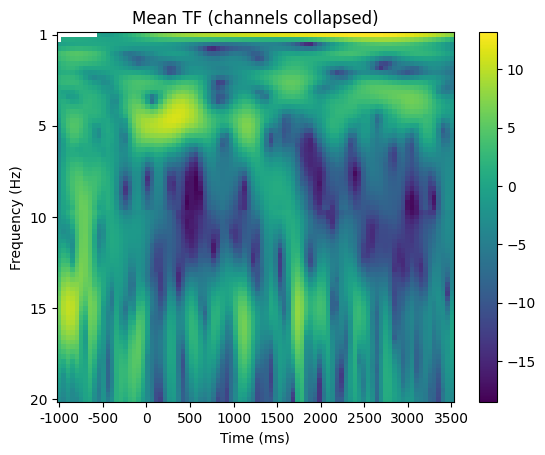

In [ ]:
plt.imshow(ii[0][0].mean(axis=0), aspect='auto')

# X axis: time from -1000ms to 3500ms
n_time = ii[0][0].shape[-1]
time_start = -1000
time_end = 3500
time_ticks = np.linspace(time_start, time_end, 10)
time_tick_positions = np.linspace(0, n_time - 1, len(time_ticks))
plt.xticks(time_tick_positions, [f"{int(t)}" for t in time_ticks])

# Y axis: frequency from 1Hz to 20Hz
n_freq = ii[0][0].mean(axis=0).shape[0]
freq_start = 1
freq_end = 20
freq_ticks = np.linspace(freq_start, freq_end, 5)
freq_tick_positions = np.linspace(0, n_freq - 1, len(freq_ticks))
plt.yticks(freq_tick_positions, [f"{int(f)}" for f in freq_ticks])

plt.xlabel("Time (ms)")
plt.ylabel("Frequency (Hz)")
plt.title("Mean TF (channels collapsed)")
plt.colorbar()
plt.show()

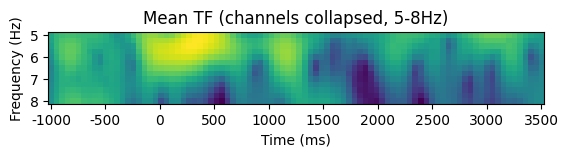

In [ ]:
plt.imshow(ii[0][0].mean(axis=0)[16:29, :])

# X axis: time from -1000ms to 3500ms (reuse from above)
n_time = ii[0][0].shape[-1]
time_start = -1000
time_end = 3500
time_ticks = np.linspace(time_start, time_end, 10)
time_tick_positions = np.linspace(0, n_time - 1, len(time_ticks))
plt.xticks(time_tick_positions, [f"{int(t)}" for t in time_ticks])

# Y axis: frequency from 5Hz to 8Hz (corresponds to indices 16:29)
freq_start = 5
freq_end = 8
freq_ticks = np.linspace(freq_start, freq_end, 4)
freq_tick_positions = np.linspace(0, 12, len(freq_ticks))  # 29-16=13, so 0 to 12

plt.yticks(freq_tick_positions, [f"{int(f)}" for f in freq_ticks])

plt.xlabel("Time (ms)")
plt.ylabel("Frequency (Hz)")
plt.title("Mean TF (channels collapsed, 5-8Hz)")

plt.show()